# Imports

In [1]:
import random
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Actual power traces waveform from lab (125 traces)

In [2]:
df = pd.read_csv("waveform.csv",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2493,2494,2495,2496,2497,2498,2499,2500,2501,2502
0,3931C946112FDC14A343372587056027,CDB46A2F51BEBD2CB44DCCFB0E15475B,0.416,0.476,0.436,0.436,0.412,0.370,0.384,0.446,...,0.330,0.402,0.382,0.352,0.396,0.362,0.324,0.402,0.414,NaN
1,7D4A2A655548D76B40779A8D28A82C1E,9BAEDFCB0C146AC2823E3B13EC98F7FE,0.416,0.468,0.432,0.422,0.420,0.372,0.386,0.444,...,0.336,0.388,0.382,0.362,0.392,0.350,0.320,0.390,0.430,NaN
2,C1628A849961D3C2DDAAFDF4CA4CF814,21BA33A100642B312ED2FEFA3A4FFC53,0.446,0.454,0.426,0.450,0.404,0.370,0.416,0.474,...,0.334,0.394,0.388,0.352,0.388,0.354,0.328,0.400,0.412,NaN
3,91EBA6C33176C60505FB62F733A5A8D8,3E5F873F9B162266C0D8D3D66BCA8A3B,0.400,0.494,0.440,0.448,0.416,0.392,0.396,0.454,...,0.348,0.404,0.390,0.360,0.406,0.358,0.332,0.390,0.424,NaN
4,1AAABD3500A9B0009FD26307D736D366,0DBA6A1280D1FD794D70DFF38B99424B,0.394,0.470,0.430,0.410,0.408,0.366,0.372,0.434,...,0.344,0.398,0.390,0.354,0.390,0.360,0.310,0.386,0.420,NaN


In [4]:
len(df.columns)

2503

In [5]:
len(df)

125

# Utility Functions

### Set number of traces for testing

In [6]:
no_of_traces = 100

### Hamming Weight function 

In [7]:
def hw(int_no):
    # Write Code to calculate the number of ones in a byte...
    temp = str(bin(int_no))
    count = 0
    for i in temp:
        if i == "1":
            count += 1
    return count

### Sbox corresponding values

In [8]:
Sbox = (
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)

### Generate random plain text first bytes for simulation

In [9]:
# Here, we generate random values for first byte of plaintext...
# This is the array containing first byte of all the plaintexts...
def generate_random_plaintext_first_bytes(traces):
    random_plaintext_first_bytes = []
    for random_byte in range(0, traces):
        random_plaintext_first_bytes.append(random.randint(0, 255))
#     print("\nFirst byte of plaintexts.... This is the array containing first byte of all the plaintexts...\n")
#     print(random_plaintext_first_bytes)
    return random_plaintext_first_bytes

### Obtain actual plain text first bytes from waveform.csv

In [10]:
# get actual plaintext first bytes from lab
def generate_actual_lab_plaintext_bytes(traces, which_byte):
    plaintext_target_bytes = []
    for index, row in df.head(n=traces).iterrows():
        target_byte = row[0][(which_byte-1)*2:(which_byte-1)*2+2]
        target_byte_decimal = int(target_byte,16)
        plaintext_target_bytes.append(target_byte_decimal)
    return plaintext_target_bytes

### Calculate Sbox (X XOR K) to obtain leaky Sbox values

In [11]:
# Now, let us try to build a model for all possible values of key byte using the plaintext inputs...
# Let a given first plaintext byte be denoted as x... For each first plaintext byte x, try to calculate Sbox(x xor k) where k is the first key byte...
# For example, let us build a model for k = 0x20...

k = 0x20
k = 32  # decimal

# Write Code to fill up the leaky_sbox_output_value_array with Sbox(x xor k).

def HW_SBox_X_XOR_K(k,traces,actual_lab=False,which_byte=0):
    if actual_lab == False:
        temp_random_plaintext_first_bytes = generate_random_plaintext_first_bytes(traces)
    else:
        temp_random_plaintext_first_bytes = generate_actual_lab_plaintext_bytes(traces,which_byte)
    temp_leaky_sbox_output_value_array = []
    for byte_pos in range(0, traces):
        byte_now = temp_random_plaintext_first_bytes[byte_pos] ^ k
        Sbox_output_leaky_value = Sbox[byte_now]
        temp_leaky_sbox_output_value_array.append(Sbox_output_leaky_value)
    return temp_leaky_sbox_output_value_array

print("\nValue of Leaky Sbox values for first plaintext byte....\n")
leaky_sbox_output_value_array = HW_SBox_X_XOR_K(k,no_of_traces)
print(leaky_sbox_output_value_array)


Value of Leaky Sbox values for first plaintext byte....

[25, 147, 219, 105, 221, 196, 220, 123, 23, 120, 203, 103, 50, 125, 15, 213, 82, 37, 234, 141, 193, 124, 185, 65, 48, 76, 243, 25, 13, 33, 190, 1, 194, 253, 159, 72, 251, 31, 28, 2, 85, 125, 56, 247, 183, 84, 73, 207, 56, 58, 16, 206, 0, 233, 159, 0, 235, 117, 213, 101, 56, 238, 171, 164, 106, 9, 159, 196, 84, 123, 228, 20, 89, 195, 80, 35, 85, 248, 121, 22, 14, 93, 79, 191, 39, 127, 151, 103, 124, 232, 220, 232, 87, 156, 249, 168, 92, 211, 148, 212]


### Calculate hamming weight of leaky sbox values for key byte value of 0x20

In [12]:
# Now, we know these are the leaky values... How do these values leak through the power side-channel... They leak as their hamming weights... So, we need to
# calculate the hamming weight of these leaky values...

hamming_weight_of_leaky_sbox_bytes = []

# Write Code to fill up the hamming_weight_of_leaky_sbox_bytes with HW(Sbox(x xor k))...

for byte in range(0, no_of_traces):
    hamming_weight_of_leaky_sbox_bytes.append(hw(leaky_sbox_output_value_array[byte]))
    
print("\nHamming Weight of Leaky Sbox values for first plaintext byte....\n")
print(hamming_weight_of_leaky_sbox_bytes)


Hamming Weight of Leaky Sbox values for first plaintext byte....

[3, 4, 6, 4, 6, 3, 5, 6, 4, 4, 5, 5, 3, 6, 4, 5, 3, 3, 5, 4, 3, 5, 5, 2, 2, 3, 6, 3, 3, 2, 6, 1, 3, 7, 6, 2, 7, 5, 3, 1, 4, 6, 3, 7, 6, 3, 3, 6, 3, 4, 1, 5, 0, 5, 6, 0, 6, 5, 5, 4, 3, 6, 5, 3, 4, 2, 6, 3, 3, 6, 4, 2, 4, 4, 2, 3, 4, 5, 5, 3, 3, 5, 5, 7, 4, 7, 5, 5, 5, 4, 5, 4, 5, 4, 6, 3, 4, 5, 3, 4]


### Build power model matrix for all possible values of k

In [13]:
# hamming_weight_of_leaky_sbox_bytes is your hypothetical Power Model for k = 0x20...
# But, as an attacker you do not know what is the value of k, then you try to build a model for all values of k...
# Write Code to build a hypothetical power model for all values of k... This is called a power model matrix...

no_of_possible_values_of_key_byte = 256

def get_power_model_matrix(traces,which_byte=0,actual_lab=False):
    power_model_matrix = []

    for k in range(no_of_possible_values_of_key_byte):
        leaky_sbox_output_value_array = HW_SBox_X_XOR_K(k,traces,actual_lab,which_byte)
        hamming_weight_of_leaky_sbox_bytes = []
        for byte in range(0, traces):
            hamming_weight_of_leaky_sbox_bytes.append(hw(leaky_sbox_output_value_array[byte]))

        power_model_matrix.append(hamming_weight_of_leaky_sbox_bytes)
    
    return power_model_matrix

### Generate actual power trace through simulation

In [14]:
noise_standard_deviation = 0.05

def generate_random_noise():
    n = random.normalvariate(0, noise_standard_deviation)
    return n

def generate_trace(trace_input):
    low_value = 0
    high_value = 8
    noisy_trace = []
    for i in range(0, len(trace_input)):
        trace_point = (trace_input[i] - float(low_value)) / high_value + generate_random_noise()
        noisy_trace.append(trace_point)

    return noisy_trace

### Specify correct key for simulated power trace

In [15]:
## Correct key byte
correct_key_byte = 21
power_model_matrix = get_power_model_matrix(no_of_traces)
correct_ideal_trace = power_model_matrix[correct_key_byte]
## Actual trace of SBOX
actual_power_trace = generate_trace(correct_ideal_trace)

### The actual power trace contains the trace corresponding to the Sbox operation... This corresponds to the key byte = 21...

### Now, lets try to match the hypothetical power model for all key bytes with the actual power trace...and see which one matches the best...

### Here, we use the pearson correlation coefficient to calculate relation between the hypothetical power model and actual trace...

In [16]:
def get_correlation_values(actual_power_trace, power_model_matrix): 
    correlation_values = []

  # Write code to compute correlation between model trace of every possible value of key byte and the actual trace and fill
  # up the correlation_values array...
    for key_byte_guess in range(0, no_of_possible_values_of_key_byte):
        model_trace = power_model_matrix[key_byte_guess]
        corr_value = scipy.stats.pearsonr(actual_power_trace, model_trace)
        correlation_values.append(corr_value[0])

  # Here, we are sorting the correlation values and identifying which key byte has the largest correlation...
    sorting_order = np.argsort(correlation_values)
    sorting_order = sorting_order[::-1]

    return correlation_values

correlation_values = get_correlation_values(actual_power_trace,power_model_matrix)

### Identify the rank of the correct key byte

In [17]:
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

print("No. of Traces: {}".format(no_of_traces))
print("Noise Std Dev: {}".format(noise_standard_deviation))
print("Rank of Correct Key Byte: {}".format(sorting_order[0]))

No. of Traces: 100
Noise Std Dev: 0.05
Rank of Correct Key Byte: 21


### Visualize results for correct key byte

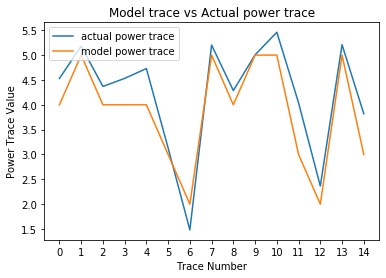

In [18]:
plt.figure(1)

x_index = []
for i in range(0,no_of_traces):
    x_index.append(i)

len_to_visualize = 15

model_trace = power_model_matrix[correct_key_byte]

# Here, I am un-normalizing the traces... so that they can be seen at the same scale...
final_actual_power_trace = [val for val in actual_power_trace]

for i in range(0,no_of_traces):
    final_actual_power_trace[i] = actual_power_trace[i]*8

# display discrete x-axis values
plt.xticks(np.arange(min(x_index), max(x_index)+1, 1))

plt.plot(x_index[0:len_to_visualize],final_actual_power_trace[0:len_to_visualize], label='actual power trace') # Plotting actual power trace...
plt.plot(x_index[0:len_to_visualize],model_trace[0:len_to_visualize], label='model power trace') # Plotting Model power trace...
plt.legend(loc="upper left")
plt.title("Model trace vs Actual power trace")
plt.xlabel("Trace Number")
plt.ylabel("Power Trace Value")
plt.show()

### Visualize correlation results for all possible key bytes 

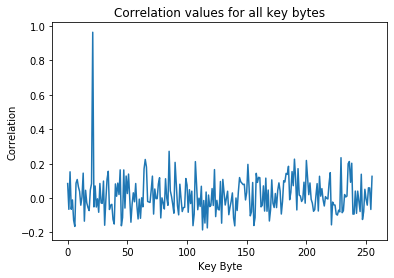

Obtained Key Byte value: 21
Correlation value: 0.9643065842002315


In [21]:
plt.figure(2)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
    x_index.append(i)

plt.plot(x_index,correlation_values)
plt.title("Correlation values for all key bytes")
plt.xlabel("Key Byte")
plt.ylabel("Correlation")
plt.show()

print("Obtained Key Byte value:",correlation_values.index(max(correlation_values)))
print("Correlation Value:", max(correlation_values))

# Plots for actual traces waveform obtained from lab

### Actual key from Lab 1 (Hex): 489DB4B302172961CC2BCB4E00E28EB7

### Matrix M: 256x100

In [22]:
matrix_m = get_power_model_matrix(100,1,True)
print(len(matrix_m))
print(len(matrix_m[0]))
print(matrix_m)

256
100
[[2, 8, 4, 2, 3, 4, 4, 2, 3, 5, 5, 2, 3, 4, 5, 5, 3, 6, 4, 7, 5, 3, 3, 2, 4, 3, 2, 3, 5, 4, 3, 5, 6, 2, 3, 3, 5, 5, 4, 2, 4, 3, 4, 4, 5, 5, 4, 4, 6, 1, 3, 4, 4, 2, 6, 5, 5, 6, 2, 3, 3, 5, 5, 5, 3, 5, 2, 3, 3, 4, 6, 2, 0, 5, 2, 3, 3, 5, 4, 3, 2, 3, 3, 4, 5, 4, 3, 2, 3, 4, 5, 5, 3, 5, 3, 3, 7, 3, 2, 6], [3, 1, 5, 2, 6, 3, 3, 4, 4, 1, 4, 3, 4, 2, 1, 5, 3, 4, 2, 4, 4, 6, 5, 4, 2, 4, 4, 3, 7, 3, 4, 5, 3, 3, 3, 3, 4, 3, 5, 4, 4, 4, 5, 6, 5, 4, 5, 5, 3, 4, 3, 2, 2, 2, 7, 3, 2, 6, 4, 5, 3, 5, 5, 4, 3, 5, 2, 2, 3, 5, 3, 5, 6, 2, 4, 5, 2, 3, 2, 3, 2, 6, 4, 2, 1, 5, 5, 4, 2, 5, 4, 2, 4, 4, 4, 6, 6, 3, 7, 3], [4, 4, 4, 5, 5, 6, 5, 2, 5, 4, 2, 2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 6, 6, 3, 7, 3, 3, 3, 4, 5, 2, 4, 4, 4, 3, 3, 5, 5, 3, 3, 1, 4, 5, 7, 2, 4, 3, 7, 3, 3, 5, 4, 3, 4, 3, 5, 5, 5, 5, 2, 3, 3, 4, 6, 5, 6, 2, 4, 4, 5, 5, 4, 3, 3, 4, 2, 6, 4, 2, 5, 5, 4, 4, 4, 4, 6, 6, 4, 3, 4, 3, 4, 3, 5, 4, 3, 3, 5, 5], [1, 6, 3, 5, 4, 7, 4, 4, 4, 5, 1, 2, 3, 2, 5, 4, 2, 4, 6, 6, 5, 2, 5, 4, 6, 6, 4, 3, 

### Matrix T: 2500x100

In [23]:
traces = df.drop([0,1,2502],axis = 1)
traces.head()

,2,3,4,5,6,7,8,9,10,11,...,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501
0,0.416,0.476,0.436,0.436,0.412,0.370,0.384,0.446,0.466,0.432,...,0.372,0.330,0.402,0.382,0.352,0.396,0.362,0.324,0.402,0.414
1,0.416,0.468,0.432,0.422,0.420,0.372,0.386,0.444,0.466,0.436,...,0.372,0.336,0.388,0.382,0.362,0.392,0.350,0.320,0.390,0.430
2,0.446,0.454,0.426,0.450,0.404,0.370,0.416,0.474,0.452,0.458,...,0.352,0.334,0.394,0.388,0.352,0.388,0.354,0.328,0.400,0.412
3,0.400,0.494,0.440,0.448,0.416,0.392,0.396,0.454,0.474,0.436,...,0.382,0.348,0.404,0.390,0.360,0.406,0.358,0.332,0.390,0.424
4,0.394,0.470,0.430,0.410,0.408,0.366,0.372,0.434,0.456,0.406,...,0.368,0.344,0.398,0.390,0.354,0.390,0.360,0.310,0.386,0.420


In [24]:
first_100_traces = traces.head(n=100)

In [25]:
first_100_traces_list = first_100_traces.values
first_100_traces_list

array([[0.416, 0.476, 0.436, ..., 0.324, 0.402, 0.414],
       [0.416, 0.468, 0.432, ..., 0.32 , 0.39 , 0.43 ],
       [0.446, 0.454, 0.426, ..., 0.328, 0.4  , 0.412],
       ...,
       [0.372, 0.478, 0.43 , ..., 0.314, 0.368, 0.428],
       [0.44 , 0.468, 0.432, ..., 0.324, 0.406, 0.42 ],
       [0.404, 0.474, 0.426, ..., 0.332, 0.394, 0.432]])

In [26]:
first_100_traces_list = first_100_traces_list.tolist()

In [27]:
print(len(first_100_traces_list))
print(len(first_100_traces_list[0]))

100
2500


In [28]:
transposed_first_100_traces_list =[list(i) for i in zip(*first_100_traces_list)]
print(len(transposed_first_100_traces_list))
print(len(transposed_first_100_traces_list[0]))
print(transposed_first_100_traces_list[0])

2500
100
[0.416, 0.416, 0.446, 0.4, 0.394, 0.462, 0.412, 0.43, 0.372, 0.382, 0.492, 0.46, 0.352, 0.466, 0.462, 0.414, 0.452, 0.448, 0.456, 0.418, 0.484, 0.336, 0.482, 0.468, 0.466, 0.432, 0.478, 0.388, 0.434, 0.41, 0.366, 0.384, 0.368, 0.434, 0.388, 0.452, 0.406, 0.464, 0.436, 0.4, 0.484, 0.352, 0.402, 0.456, 0.448, 0.462, 0.37, 0.44, 0.468, 0.382, 0.444, 0.47, 0.452, 0.396, 0.42, 0.418, 0.386, 0.36, 0.402, 0.43, 0.372, 0.356, 0.472, 0.418, 0.456, 0.468, 0.414, 0.408, 0.446, 0.43, 0.36, 0.35, 0.476, 0.43, 0.42, 0.366, 0.432, 0.478, 0.438, 0.428, 0.458, 0.406, 0.434, 0.442, 0.432, 0.422, 0.39, 0.474, 0.388, 0.466, 0.372, 0.464, 0.424, 0.37, 0.412, 0.4, 0.452, 0.372, 0.44, 0.404]


### Get Matrix C: 256x2500
### Each row corresponds to the possible value of key byte.
### Each column corresponds to the time index of power trace.

In [29]:
matrix_c = []
for col in transposed_first_100_traces_list:
    correlation_values = get_correlation_values(col,matrix_m)
    matrix_c.append(correlation_values)

In [30]:
print(len(matrix_c))
print(len(matrix_c[0]))

2500
256


In [31]:
transposed_matrix_c =[list(i) for i in zip(*matrix_c)]
print(len(transposed_matrix_c))
print(len(transposed_matrix_c[0]))

256
2500


### Obtain highest absolute correlation for all possible key values

### KEY: 489DB4B302172961CC2BCB4E00E28EB7 (Hex)

In [32]:
highest_correlation_for_all_key_bytes = [abs(max(correlation_list, key=abs)) for correlation_list in transposed_matrix_c]

### Obtain highest absolute correlations for all possible key values (1st byte only)

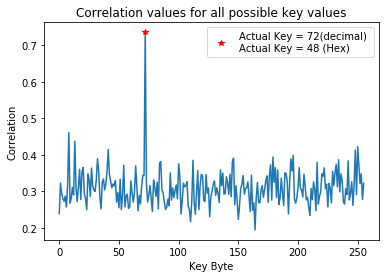

Obtained Key Byte value: 0x48
Correlation Value: 0.7357348550991638


In [33]:
plt.figure(3)

x_index = []
for i in range(0,len(transposed_matrix_c)):
    x_index.append(i)

plt.plot(x_index,highest_correlation_for_all_key_bytes)
plt.title("Correlation values for all possible key values")
plt.xlabel("Key Byte")
plt.ylabel("Correlation")
plt.plot(x_index[72], highest_correlation_for_all_key_bytes[72], 'r*',label=f"Actual Key = {72}(decimal) \nActual Key = {48} (Hex)")
plt.legend()

plt.show()

print("Obtained Key Byte value:",hex(highest_correlation_for_all_key_bytes.index(max(highest_correlation_for_all_key_bytes))))
print("Correlation Value:", max(highest_correlation_for_all_key_bytes))

## Plot the correlation values for all 16 key bytes

In [35]:
list_full_16_bytes_highest_correlation_for_all_key_bytes = []

for i in range(1,16+1):
    matrix_m = get_power_model_matrix(100,i, True)
    
    matrix_c = []
    for col in transposed_first_100_traces_list:
        correlation_values = get_correlation_values(col,matrix_m)
        matrix_c.append(correlation_values)
    transposed_matrix_c =[list(i) for i in zip(*matrix_c)]

    highest_correlation_for_all_key_bytes = [abs(max(correlation_list, key=abs)) for correlation_list in transposed_matrix_c]

    list_full_16_bytes_highest_correlation_for_all_key_bytes.append(highest_correlation_for_all_key_bytes)
        
print(list_full_16_bytes_highest_correlation_for_all_key_bytes)

[[0.2392375524726448, 0.3225089897413491, 0.29305252815837646, 0.27982375716105046, 0.2724256205975838, 0.2867691863799854, 0.2569785683624481, 0.31922683007085983, 0.4606338382530557, 0.26748175683675607, 0.2803220937906613, 0.3104423570207355, 0.28973899073137843, 0.4369723325442662, 0.3096800827581317, 0.27170790501650255, 0.3116434378567596, 0.36038693348239936, 0.2771783691266614, 0.35325152789346964, 0.3650741078973695, 0.2923461825229945, 0.279699073845268, 0.24948060865747587, 0.3476124570663517, 0.33083860160943646, 0.28573064927097586, 0.36360827033758447, 0.31489905110383865, 0.30331169207768843, 0.29952909524212756, 0.331268144025421, 0.38927116066209017, 0.3552520558858408, 0.28545582835198835, 0.25140353261678944, 0.32489295890298525, 0.33383532789431236, 0.3037091930531429, 0.32009537585849374, 0.3544538429328173, 0.4142108572503524, 0.34614975607611864, 0.32878222899122583, 0.3094941618607676, 0.3200191169904755, 0.3146538156366203, 0.3292743939883386, 0.269866757458757

In [36]:
keys_in_list = ['0x48', '0x9d', '0xb4', '0xb3', '0x02', '0x17', '0x29', '0x61', '0xcc', '0x2b', '0xcb', '0x4e', '0x00', '0xe2', '0x8e', '0xb7']

In [37]:
int(keys_in_list[0],0)

72

### Obtain highest correlations for all possible key values (all 16 bytes)

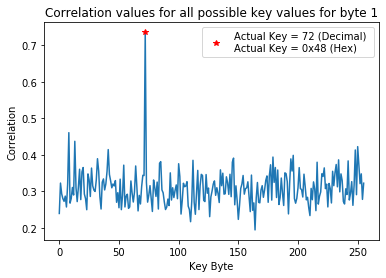

Obtained Key Byte value: 0x48
Correlation Value: 0.7357348550991638


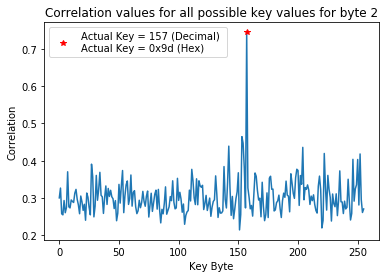

Obtained Key Byte value: 0x9d
Correlation Value: 0.7445325148444585


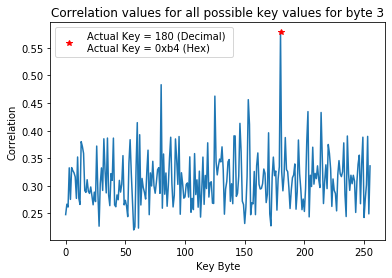

Obtained Key Byte value: 0xb4
Correlation Value: 0.5782505636198819


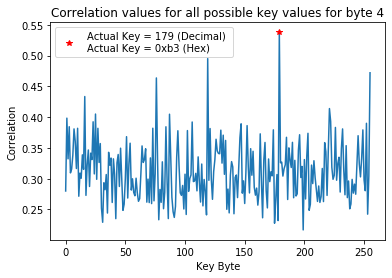

Obtained Key Byte value: 0xb3
Correlation Value: 0.5378913804424741


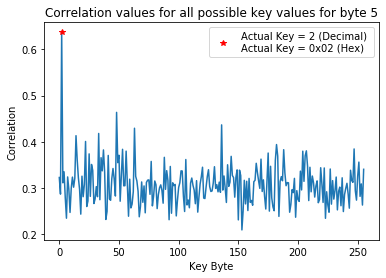

Obtained Key Byte value: 0x2
Correlation Value: 0.6369121736790884


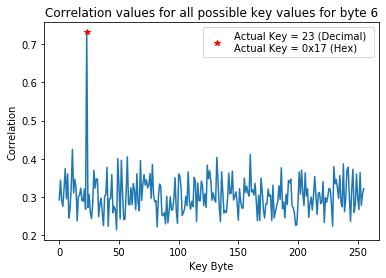

Obtained Key Byte value: 0x17
Correlation Value: 0.7319160957399492


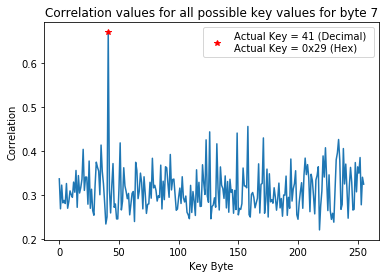

Obtained Key Byte value: 0x29
Correlation Value: 0.6703469877226204


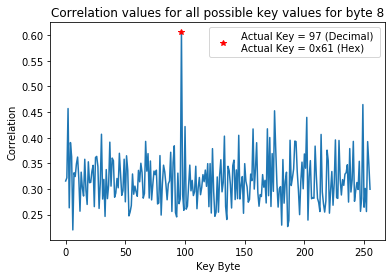

Obtained Key Byte value: 0x61
Correlation Value: 0.605669227443951


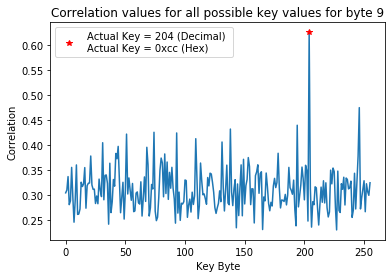

Obtained Key Byte value: 0xcc
Correlation Value: 0.6248719669247582


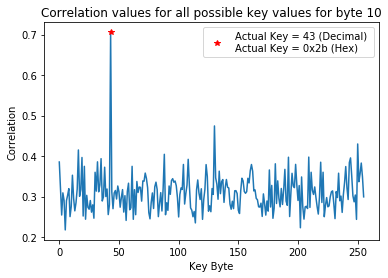

Obtained Key Byte value: 0x2b
Correlation Value: 0.7058861454114788


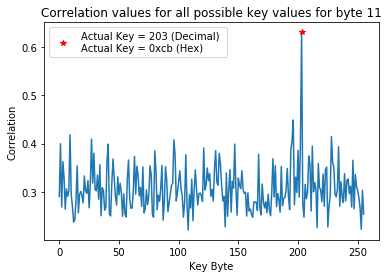

Obtained Key Byte value: 0xcb
Correlation Value: 0.6305635511234695


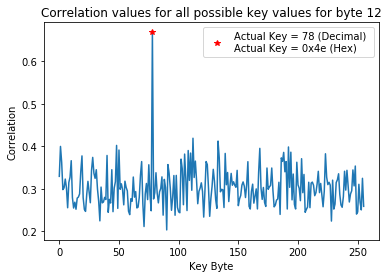

Obtained Key Byte value: 0x4e
Correlation Value: 0.668792645597908


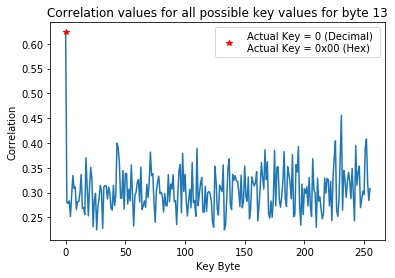

Obtained Key Byte value: 0x0
Correlation Value: 0.6234499258520749


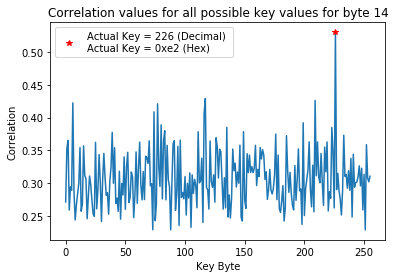

Obtained Key Byte value: 0xe2
Correlation Value: 0.5304281685321296


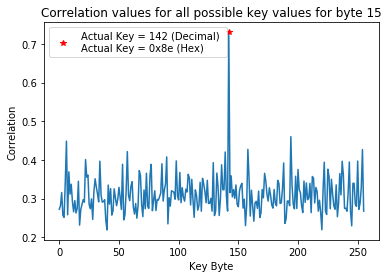

Obtained Key Byte value: 0x8e
Correlation Value: 0.730341856207595


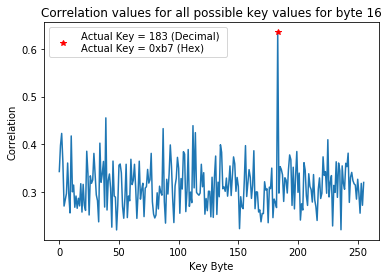

Obtained Key Byte value: 0xb7
Correlation Value: 0.6343463535423917


In [49]:
for index, highest_correlation_for_all_key_bytes in enumerate(list_full_16_bytes_highest_correlation_for_all_key_bytes):
    x_index = []
    for i in range(0,len(transposed_matrix_c)):
        x_index.append(i)

    plt.plot(x_index,highest_correlation_for_all_key_bytes)
    plt.title(f"Correlation values for all possible key values for byte {index+1}")
    plt.xlabel("Key Byte")
    plt.ylabel("Correlation")
    plt.plot(x_index[int(keys_in_list[index],0)], highest_correlation_for_all_key_bytes[int(keys_in_list[index],0)], 'r*',label=f"Actual Key = {int(keys_in_list[index],0)} (Decimal) \nActual Key = {keys_in_list[index]} (Hex)")
    plt.legend()

    plt.show()
    
    print("Obtained Key Byte value:",hex(highest_correlation_for_all_key_bytes.index(max(highest_correlation_for_all_key_bytes))))
    print("Correlation Value:", max(highest_correlation_for_all_key_bytes))

### Get all 16 bytes of keys

### KEY: 489DB4B302172961CC2BCB4E00E28EB7 (Hex)

In [39]:
final_key_per_byte_hex = []

for i in range(1,16+1):
    matrix_m = get_power_model_matrix(100,i, True)
    
    matrix_c = []
    for col in transposed_first_100_traces_list:
        correlation_values = get_correlation_values(col,matrix_m)
        matrix_c.append(correlation_values)
    transposed_matrix_c =[list(i) for i in zip(*matrix_c)]

    highest_correlation_for_all_key_bytes = [abs(max(correlation_list, key=abs)) for correlation_list in transposed_matrix_c]

    final_key_per_byte_hex.append(hex(highest_correlation_for_all_key_bytes.index(max(highest_correlation_for_all_key_bytes))))
    
    print(hex(highest_correlation_for_all_key_bytes.index(max(highest_correlation_for_all_key_bytes))))
    
print(final_key_per_byte_hex)


0x48
0x9d
0xb4
0xb3
0x2
0x17
0x29
0x61
0xcc
0x2b
0xcb
0x4e
0x0
0xe2
0x8e
0xb7
['0x48', '0x9d', '0xb4', '0xb3', '0x2', '0x17', '0x29', '0x61', '0xcc', '0x2b', '0xcb', '0x4e', '0x0', '0xe2', '0x8e', '0xb7']


### Get all correlation values according to different number of traces

In [1]:
# when 10 traces, we want 256 correlation values
# when 20 traces, we want 256 correlation values
# Up to 100 traces

In [41]:
## Visualize correlation coefficient vs no of traces
def generate_correlation_for_all_k(no_of_traces, index = 1):
    matrix_m = get_power_model_matrix(no_of_traces,index,True)
    first_x_traces = traces.head(n=no_of_traces)
    first_x_traces_list = first_x_traces.values
    first_x_traces_list = first_x_traces_list.tolist()
    transposed_first_x_traces_list =[list(i) for i in zip(*first_x_traces_list)]
    matrix_c = []
    for col in transposed_first_x_traces_list:
        correlation_values = get_correlation_values(col,matrix_m)
        matrix_c.append(correlation_values)
    transposed_matrix_c =[list(i) for i in zip(*matrix_c)]

    highest_correlation_for_all_key_bytes = [abs(max(correlation_list, key=abs)) for correlation_list in transposed_matrix_c]
    
    return highest_correlation_for_all_key_bytes 

In [43]:
keys_in_list = ['0x48', '0x9d', '0xb4', '0xb3', '0x02', '0x17', '0x29', '0x61', '0xcc', '0x2b', '0xcb', '0x4e', '0x00', '0xe2', '0x8e', '0xb7']
compiled_transposed_correlation_list_16_bytes = []
for index, key in enumerate(keys_in_list):
    correlation_per_measurement = []
#     print(f"We are processing the {index} key.")
    for trace in range(10,101,10):
        temp_correlation_list = generate_correlation_for_all_k(trace, index+1)
        correlation_per_measurement.append(temp_correlation_list)
    
    transposed_correlation_list =[list(i) for i in zip(*correlation_per_measurement)]
    compiled_transposed_correlation_list_16_bytes.append(transposed_correlation_list)

### Generating correlation for each possible key value against number of traces

In [ ]:
# Dimension of compiled_transposed_correlation_list_16_bytes is 16 x 256 x 10
# 256 because of the 256 possibile combinations for each byte
# 10 because of 10, 20, 30 ... 100 traces

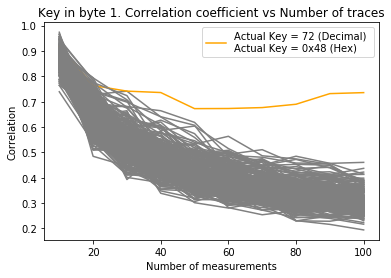

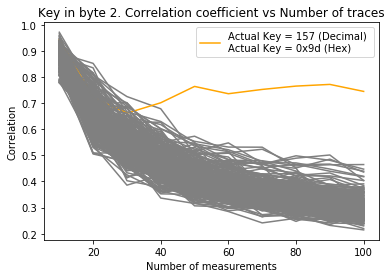

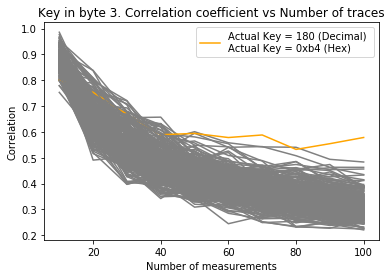

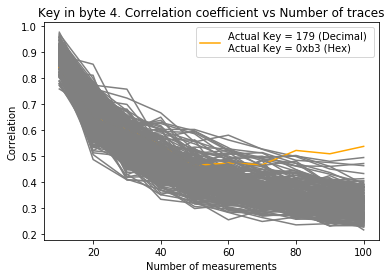

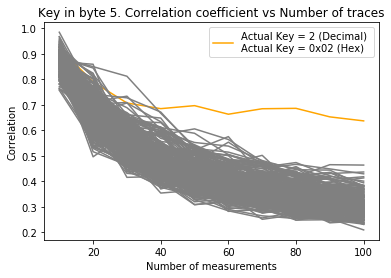

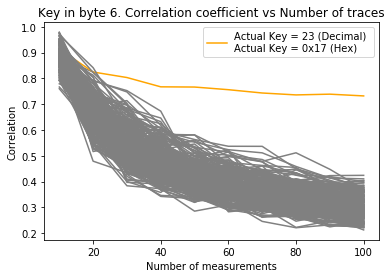

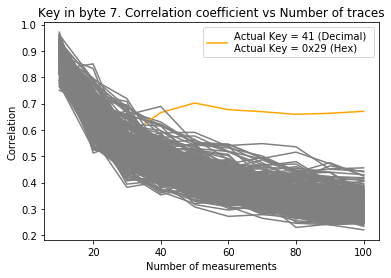

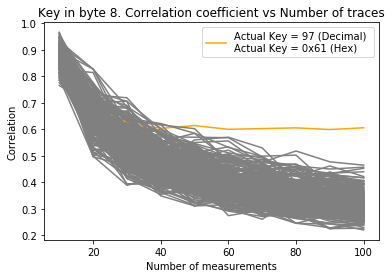

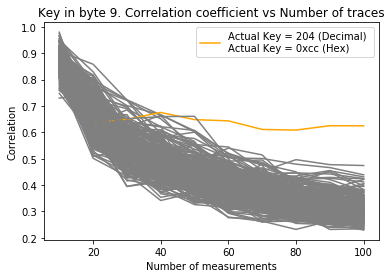

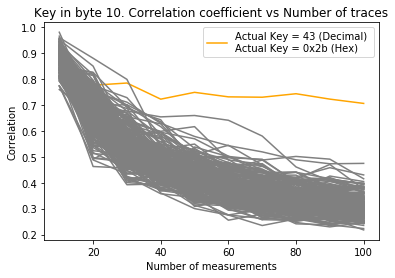

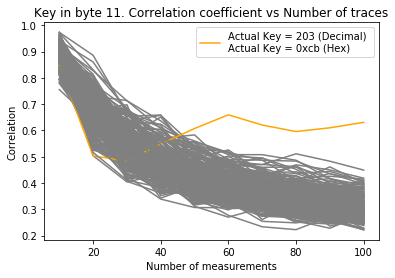

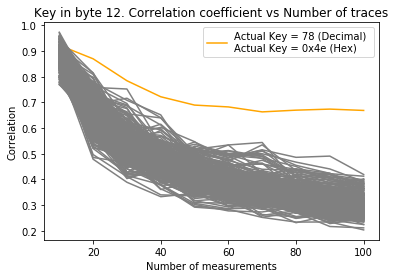

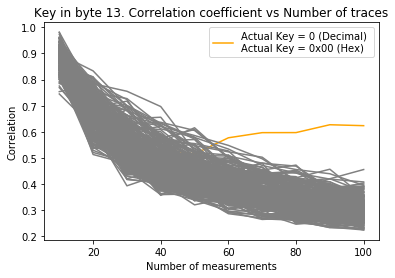

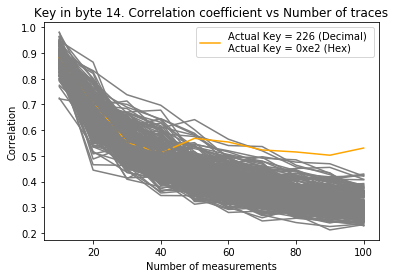

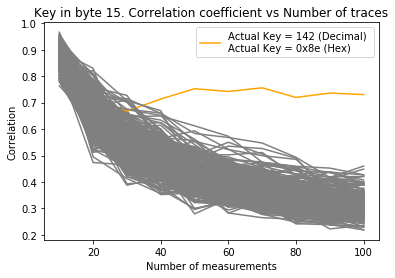

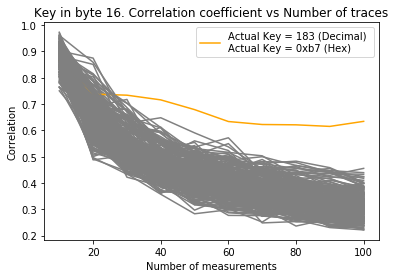

In [48]:
# Outer for loop to loop through the 16 possible key bytes
for outer_index, transposed_correlation_list in enumerate(compiled_transposed_correlation_list_16_bytes):

    x_index = []
    for i in range(10,101,10):
        x_index.append(i)

    for i, y in enumerate(transposed_correlation_list):
        if i == int(keys_in_list[outer_index], 0):
             plt.plot(x_index,y,color = 'orange', label=f"Actual Key = {i} (Decimal) \nActual Key = {keys_in_list[outer_index]} (Hex)")
        else:
            plt.plot(x_index,y,color = 'grey')
    
    plt.title(f"Key in byte {outer_index+1}. Correlation coefficient vs Number of traces")
    plt.xlabel("Number of measurements")
    plt.ylabel("Correlation")
    plt.legend()

    plt.show()

### Check number of matching bits

In [45]:
from collections import Counter

def matching_bits(actual_key, predicted_key, no_of_bits):
    ak_xor_pk = actual_key^predicted_key
#     print(Counter(bin(ak_xor_pk))['1'])
    return no_of_bits - Counter(bin(ak_xor_pk))['1']

### Find number of recovered bits for increasing number of traces

In [46]:
bits_recovered_vs_trace_list = []
for key in keys_in_list:
    print(key)
    bits_recovered = []

    for no_of_traces in range(2,100):
        power_model_matrix = get_power_model_matrix(no_of_traces)
        correct_key_byte = int(str(key), 0)
        correct_ideal_trace = power_model_matrix[correct_key_byte]
        actual_power_trace = generate_trace(correct_ideal_trace)
        temp = get_correlation_values(actual_power_trace,power_model_matrix)
        key = temp.index(max(temp))
        bits_recovered.append(matching_bits(correct_key_byte, key,8))
    
    bits_recovered_vs_trace_list.append(bits_recovered)

0x48


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


0x9d
0xb4
0xb3
0x02
0x17
0x29
0x61
0xcc
0x2b
0xcb
0x4e
0x00
0xe2
0x8e
0xb7


### Generate graph to show number of recovered bits against number of traces for all 16 bytes

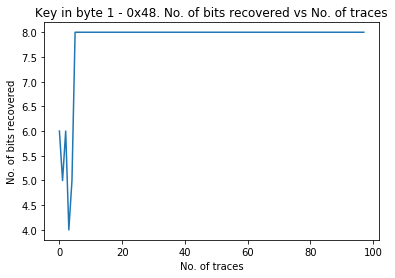

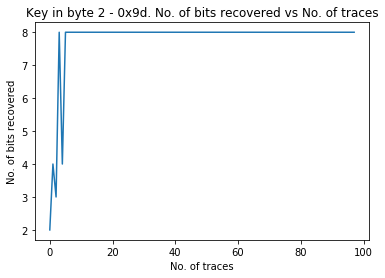

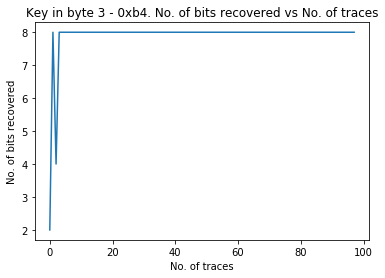

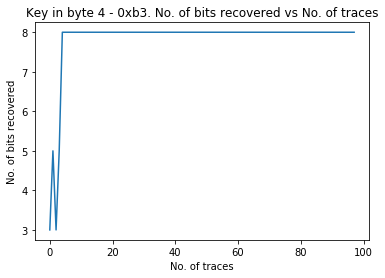

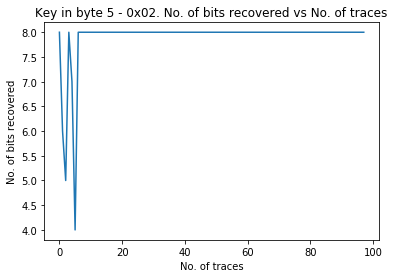

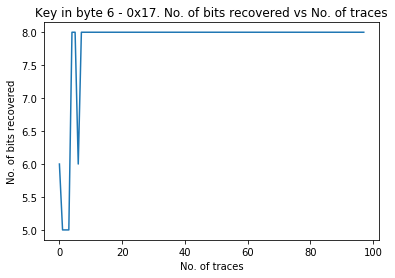

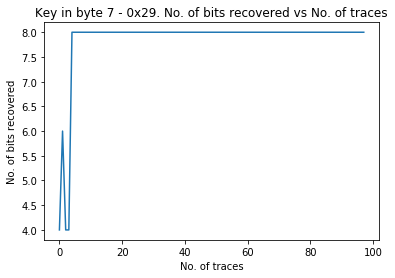

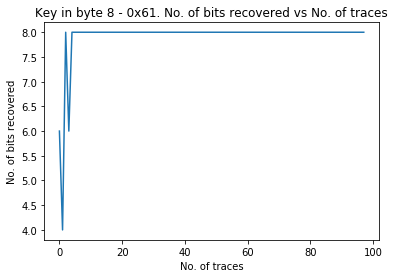

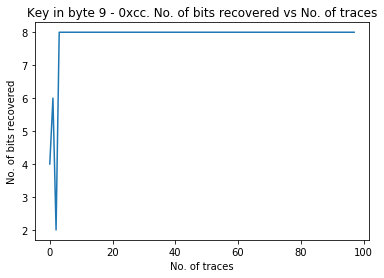

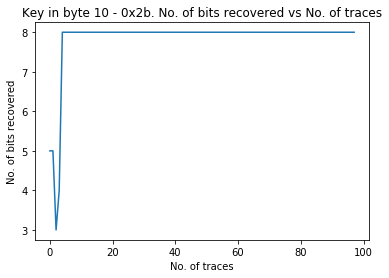

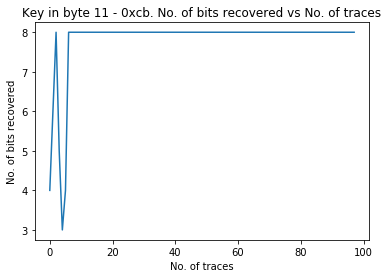

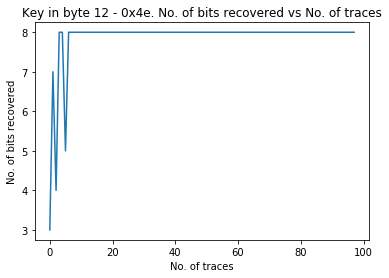

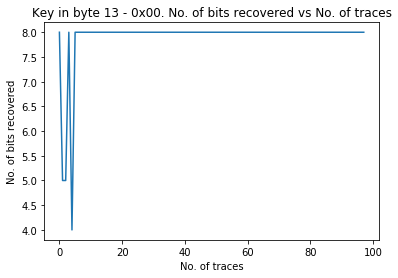

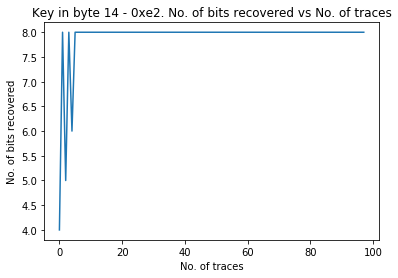

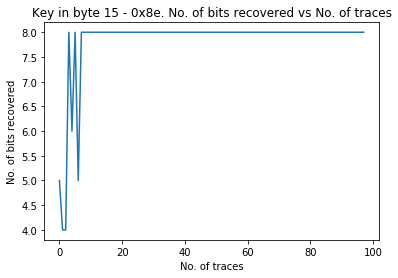

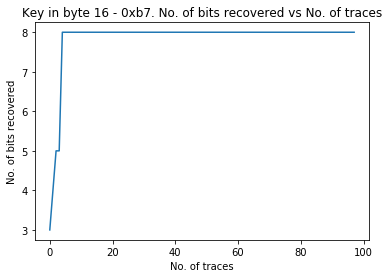

In [50]:
for index, bits_recovered in enumerate(bits_recovered_vs_trace_list):
    x_index = []
    for i in range(len(bits_recovered)):
        x_index.append(i)

    plt.plot(x_index,bits_recovered)

    plt.title(f"Key in byte {index+1} - {keys_in_list[index]}. No. of bits recovered vs No. of traces")
    plt.xlabel("No. of traces")
    plt.ylabel("No. of bits recovered")
    plt.show()